In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('Data_Entry_2017.csv')
metrics = pd.read_csv('training_metrics.csv')
val_pred = pd.read_csv('val_predictions.csv')

In [ ]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112120 non-null  object 
 1   Finding Labels               112120 non-null  object 
 2   Follow-up #                  112120 non-null  int64  
 3   Patient ID                   112120 non-null  int64  
 4   Patient Age                  112120 non-null  int64  
 5   Patient Gender               112120 non-null  object 
 6   View Position                112120 non-null  object 
 7   OriginalImage[Width          112120 non-null  int64  
 8   Height]                      112120 non-null  int64  
 9   OriginalImagePixelSpacing[x  112120 non-null  float64
 10  y]                           112120 non-null  float64
 11  Unnamed: 11                  0 non-null       float64
dtypes: float64(3), int64(5), object(4)
memory usage: 10.3+ MB


In [ ]:
#check deseases name
labels = []
for i in df['Finding Labels']:
  diseases = i.split('|')
  for j in diseases:
    if j != 'No Finding':
      labels.append(j)

print('diseases label')
for i in sorted(set(labels)):
  print(i)

diseases label
Atelectasis
Cardiomegaly
Consolidation
Edema
Effusion
Emphysema
Fibrosis
Hernia
Infiltration
Mass
Nodule
Pleural_Thickening
Pneumonia
Pneumothorax


In [ ]:
print(df['Patient Age'].describe())

count    112120.000000
mean         46.901463
std          16.839923
min           1.000000
25%          35.000000
50%          49.000000
75%          59.000000
max         414.000000
Name: Patient Age, dtype: float64


In [ ]:
print(df['Patient Gender'].value_counts())

Patient Gender
M    63340
F    48780
Name: count, dtype: int64


In [ ]:
age_counts = df['Patient Age'].value_counts()
most_common_age = age_counts.idxmax()
count = age_counts.max()

print(f"The most common patient age is: {most_common_age} (occurs {count} times)")

The most common patient age is: 58 (occurs 3209 times)


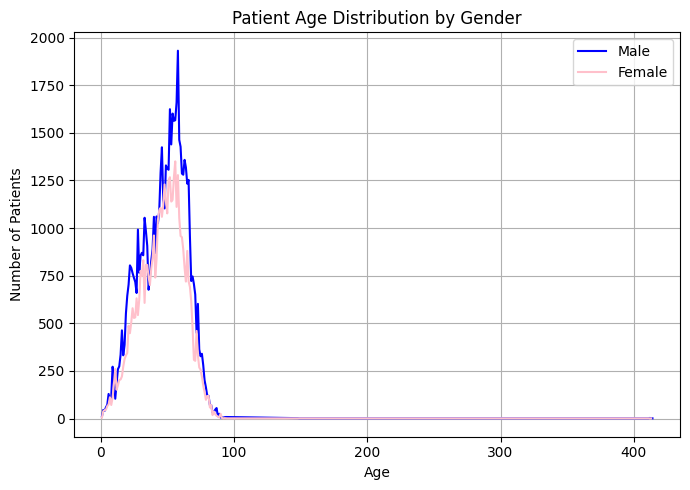

In [ ]:
# Count how many times each age appears per gender
male_counts = df[df['Patient Gender'] == 'M']['Patient Age'].value_counts().sort_index()
female_counts = df[df['Patient Gender'] == 'F']['Patient Age'].value_counts().sort_index()

plt.figure(figsize=(7, 5))

# Plot male age distribution
plt.plot(male_counts.index, male_counts.values, label='Male', color='blue')

# Plot female age distribution
plt.plot(female_counts.index, female_counts.values, label='Female', color='pink')

plt.title('Patient Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
metrics.head()

,Epoch,Loss,Accuracy
0,1,0.156898,0.536568
1,2,0.145929,0.541242
2,3,0.138842,0.547333
3,4,0.129171,0.560293
4,5,0.113676,0.587112


In [ ]:
metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Epoch     50 non-null     int64  
 1   Loss      50 non-null     float64
 2   Accuracy  50 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.3 KB


In [ ]:
metrics.describe()

,Epoch,Loss,Accuracy
count,50.00000,50.000000,50.000000
mean,25.50000,0.028787,0.886158
std,14.57738,0.039933,0.128736
min,1.00000,0.006099,0.536568
25%,13.25000,0.008167,0.893052
50%,25.50000,0.011742,0.943052
75%,37.75000,0.022478,0.960531
max,50.00000,0.156898,0.970309


In [ ]:
metrics['Accuracy'].max()

0.9703085979307884

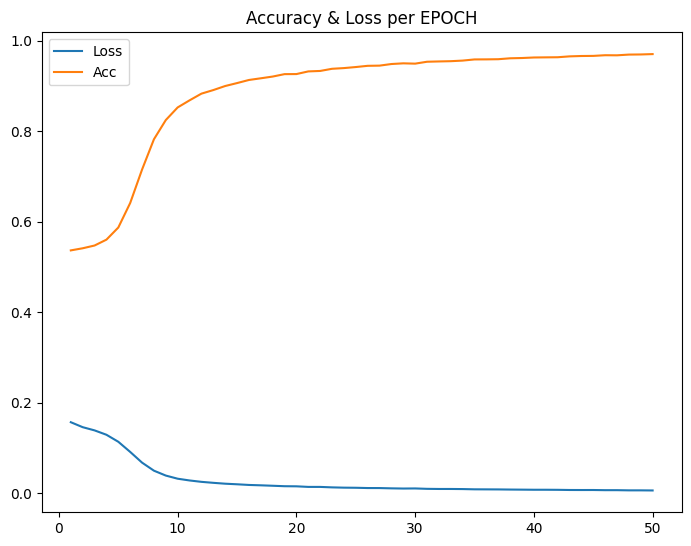

In [ ]:
fig = plt.figure()

x= metrics['Epoch']
y= metrics['Loss']
z= metrics['Accuracy']

ax = fig.add_axes([0,0,1,1])
ax.plot(x,y,label='Loss')
ax.plot(x,z,label='Acc')
plt.title("Accuracy & Loss per EPOCH")
plt.legend()

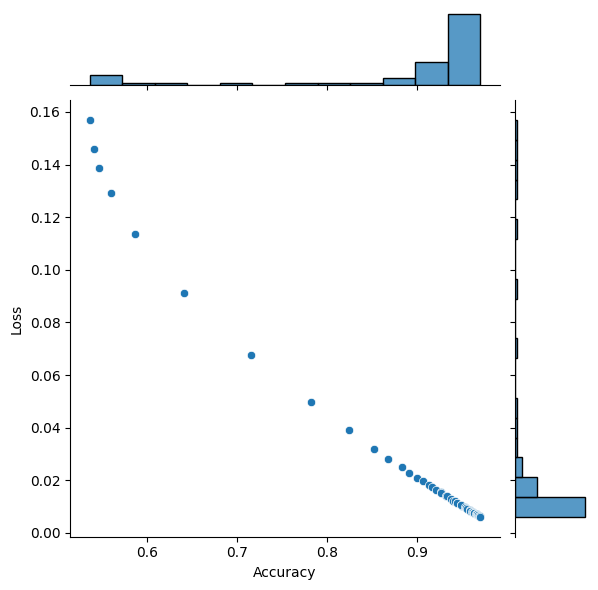

In [ ]:
sns.jointplot(metrics,x='Accuracy',y='Loss')

In [ ]:
val_pred.head()

,Index,Atelectasis_pred,Cardiomegaly_pred,Consolidation_pred,Edema_pred,Effusion_pred,Emphysema_pred,Fibrosis_pred,Hernia_pred,Infiltration_pred,...,Effusion_true,Emphysema_true,Fibrosis_true,Hernia_true,Infiltration_true,Mass_true,Nodule_true,Pleural_Thickening_true,Pneumonia_true,Pneumothorax_true
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
val_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Index                    112120 non-null  int64
 1   Atelectasis_pred         112120 non-null  int64
 2   Cardiomegaly_pred        112120 non-null  int64
 3   Consolidation_pred       112120 non-null  int64
 4   Edema_pred               112120 non-null  int64
 5   Effusion_pred            112120 non-null  int64
 6   Emphysema_pred           112120 non-null  int64
 7   Fibrosis_pred            112120 non-null  int64
 8   Hernia_pred              112120 non-null  int64
 9   Infiltration_pred        112120 non-null  int64
 10  Mass_pred                112120 non-null  int64
 11  Nodule_pred              112120 non-null  int64
 12  Pleural_Thickening_pred  112120 non-null  int64
 13  Pneumonia_pred           112120 non-null  int64
 14  Pneumothorax_pred        112120 non-

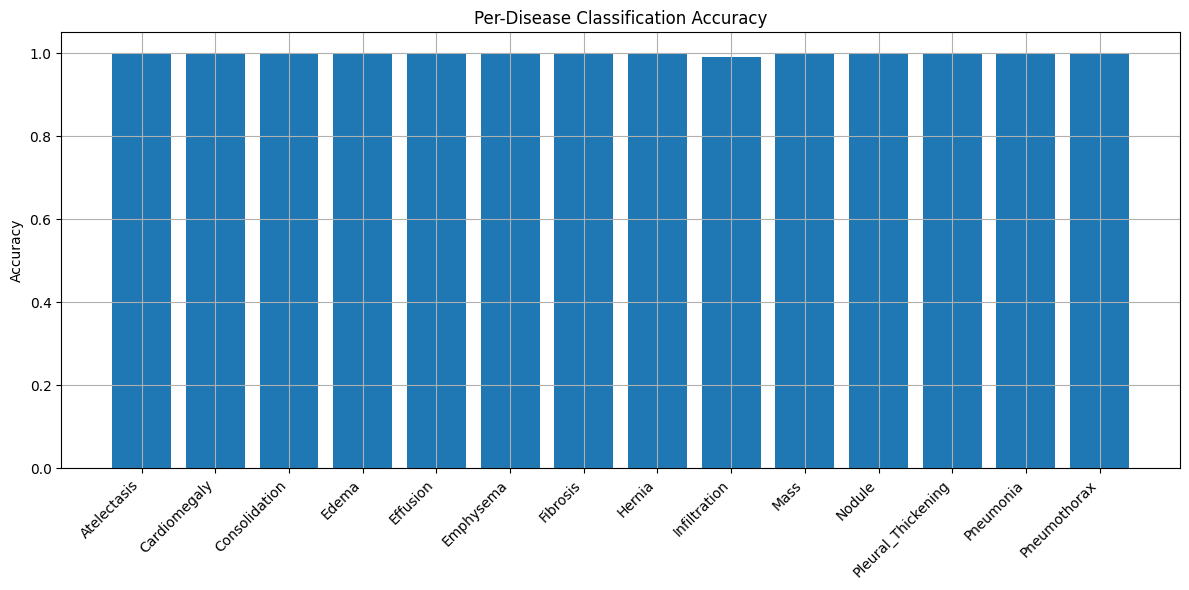

In [ ]:
diseases = [col.replace('_pred', '') for col in val_pred.columns if '_pred' in col]
accuracies = []

for disease in diseases:
    correct = (val_pred[f'{disease}_pred'] == val_pred[f'{disease}_true']).sum()
    acc = correct / len(val_pred)
    accuracies.append(acc)

plt.figure(figsize=(12, 6))
plt.bar(diseases, accuracies)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title("Per-Disease Classification Accuracy")
plt.tight_layout()
plt.grid(True)

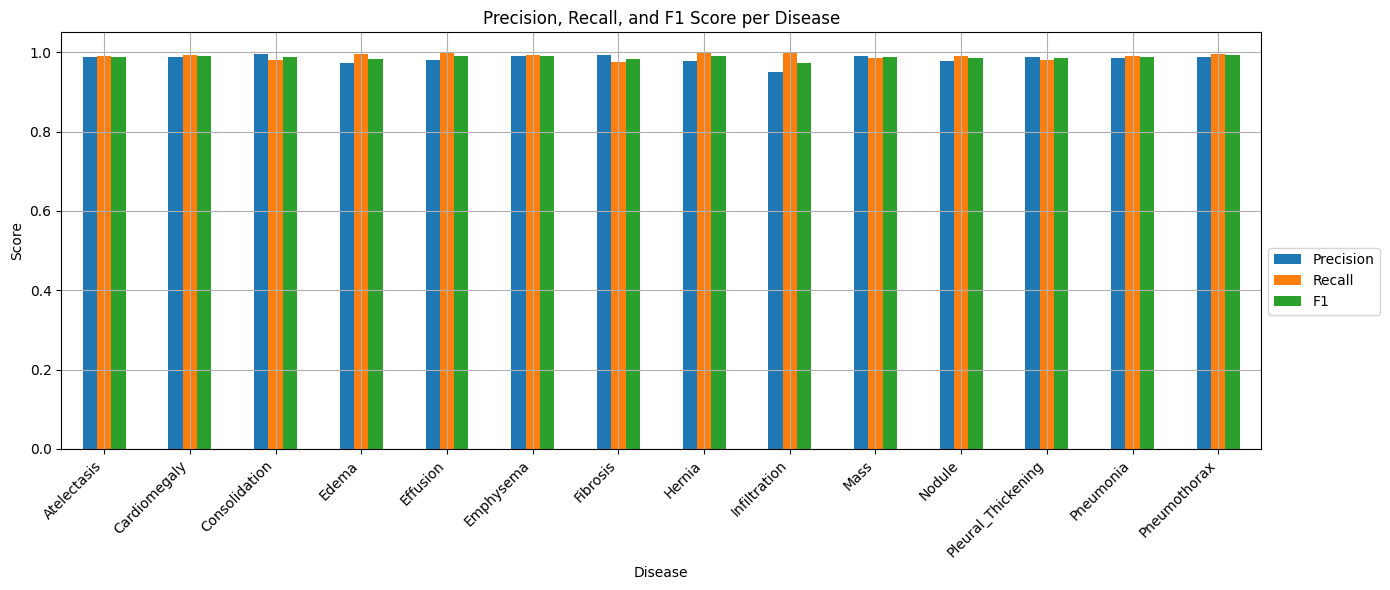

In [ ]:
metrics = {"Disease": [], "Precision": [], "Recall": [], "F1": []}

for disease in diseases:
    y_true = val_pred[f'{disease}_true']
    y_pred = val_pred[f'{disease}_pred']
    metrics["Disease"].append(disease)
    metrics["Precision"].append(precision_score(y_true, y_pred, zero_division=0)) # acc tp/ tp + fp
    metrics["Recall"].append(recall_score(y_true, y_pred, zero_division=0))  # sensitive of accuracy tp / tp+fn
    metrics["F1"].append(f1_score(y_true, y_pred, zero_division=0))

metrics_df = pd.DataFrame(metrics)
metrics_df.set_index("Disease").plot(kind='bar', figsize=(14,6), grid=True)
plt.title("Precision, Recall, and F1 Score per Disease")
plt.ylabel("Score")
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

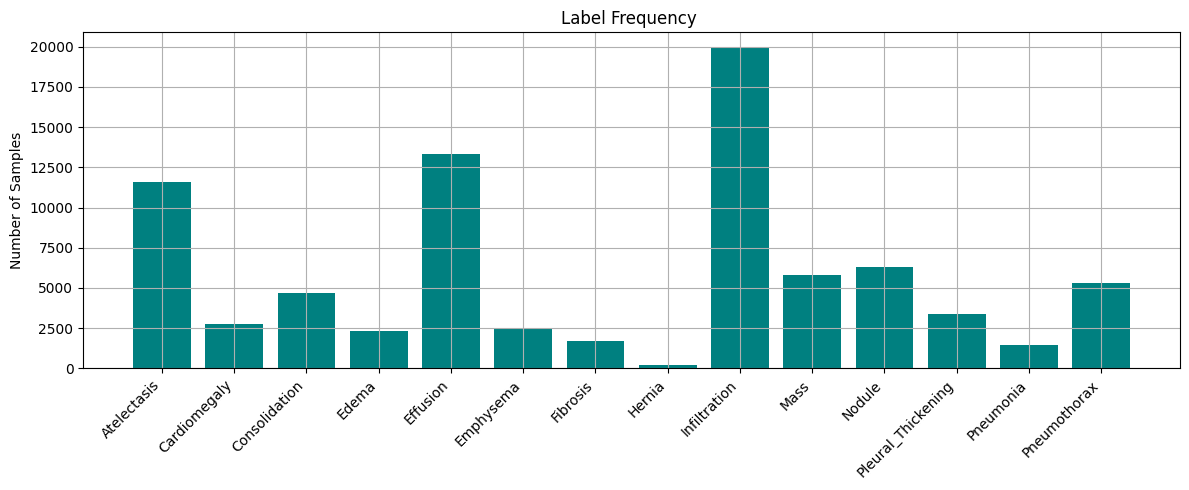

In [ ]:
true_counts = [val_pred[f'{d}_true'].sum() for d in diseases]

plt.figure(figsize=(12, 5))
plt.bar(diseases, true_counts, color='teal')
plt.xticks(rotation=45, ha='right')
plt.title("Label Frequency ")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.grid(True)